In [1]:
import pandas as pd
data = pd.read_csv('processed_data.csv',sep=';')

# przydatność implementowanej metody dla testowanych danych i obranych parametrów¶

In [5]:
from IPython.display import HTML, display
from ALSAlgorithm import ALS
from processData import sort, create_data, get_time_and_result
from objectiveFunction import objectiveFunction

import numpy as np
import pandas as pd

rating = sort(df=data, category='Music', users=10, products=10, sort_user=True)
train, test = create_data(rating, testSize = 20)

als = ALS(R=train, d=3, reg=0.1)

val = als.solve(80)

predicted = als.prediction()

output_html = "";
output_html += "<table>"

for i in range(rating.shape[0]):
    output_html += "<tr>"
    for j in range(rating.shape[1]):
        was_predicted = test[i][j] != 0
        
        output_html += "<td style='color: {color};font-size: 15px;'>{ratingValue:.2f} | {predictedValue:.2f}</td>".format(
            ratingValue=rating[i][j], predictedValue=predicted[i][j], color='#FF00FF' if was_predicted else '#FFFFFF'
        )
    
    output_html += "</tr>"

output_html += "</table>"
display(HTML(output_html))


NameError: name 'test_data' is not defined

# tempo zbieżności metody ALS w zależności od obranych parametrów

In [ ]:
from generateDataForTask import *

data_40_Users_20_Products = generate_data_for_second_task(data,40,20)
data_400_Users_200_products = generate_data_for_second_task(data,400,200)
data_500_Users_1000_products = generate_data_for_second_task(data,500,1000)

In [24]:
from generateDataForTask import *

dataFirst = generate_data_for_first_task(data,40,20,fileName='output1.csv')
dataSecond = generate_data_for_first_task(data,400,200,fileName='output2.csv')
dataThird = generate_data_for_first_task(data,500,1000, fileName="output3.csv")

# wpływ parametru d na jakość stworzonych rekomendacji i czas obliczeń

In [25]:
from generateDataForTask import *

data_40_Users_20_Products = generate_data_for_second_task(data,40,20)
data_400_Users_200_products = generate_data_for_second_task(data,400,200)
data_500_Users_1000_products = generate_data_for_second_task(data,500,1000)

NameError: name 'data_40_Users_20_Products' is not defined

In [7]:
import matplotlib.pyplot as plt

axis_x = (2, 3,5 ,8 ,13 ,21, 25, 28)
plt.figure(figsize=(16, 9), dpi= 80)
firstTime=[]
secondTime=[]
thirdTime=[]
for i in range(0, 8):
    firstTime.append(data_40_Users_20_Products[i]['time'])
    secondTime.append(data_400_Users_200_products[i]['time'])
    thirdTime.append(data_500_Users_1000_products[i]['time'])

plt.plot(axis_x, firstTime, color="black", label='Macierz 40x20')
plt.plot(axis_x, secondTime, color ="red", label='Macierz 400x200')
plt.plot(axis_x, thirdTime, color="purple",label='Macierz 1000x500')

    
plt.legend()
plt.yscale('symlog')
plt.xlabel('d')
plt.ylabel('czas(s)')
plt.title('Czas wykonywania metody ALS w zależności od parametru d dla lamda = 0.1')
plt.savefig('time.png')
plt.show()


<Figure size 1280x720 with 1 Axes>

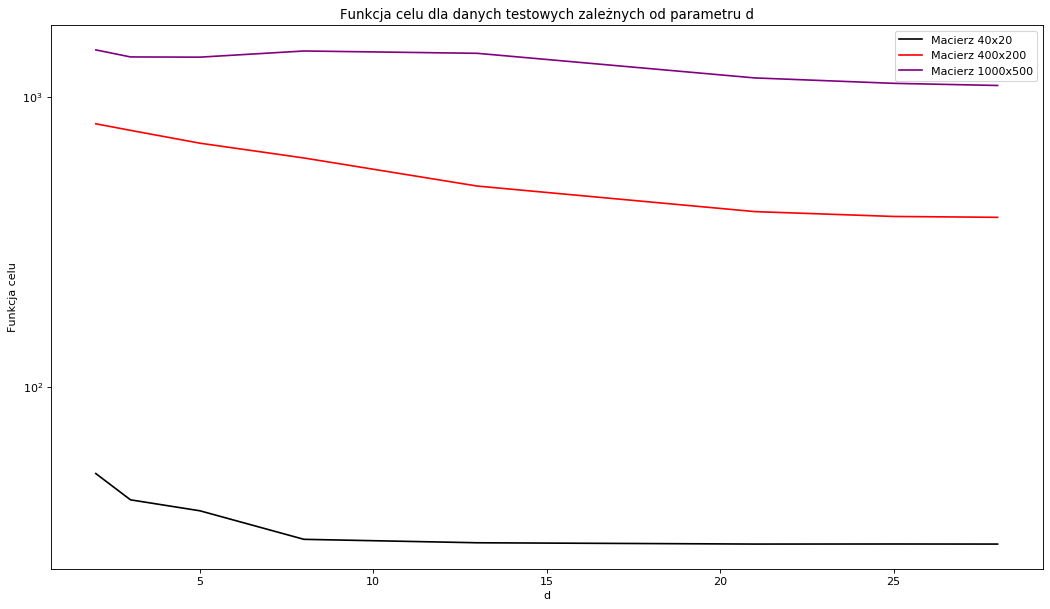

In [8]:
firstObjValues=[]
secondObjValues=[]
thirdObjValues=[]

for i in range(0, 8):
    firstObjValues.append(data_40_Users_20_Products[i]['obj_values'])
    secondObjValues.append(data_400_Users_200_products[i]['obj_values'])
    thirdObjValues.append(data_500_Users_1000_products[i]['obj_values'])

axis_x = (2, 3,5 ,8 ,13 ,21, 25, 28)

plt.figure(figsize=(16, 9), dpi= 80)
plt.plot(axis_x, firstObjValues, color="black", label='Macierz 40x20')
plt.plot(axis_x, secondObjValues,color ="red", label='Macierz 400x200')
plt.plot(axis_x, thirdObjValues, color="purple", label='Macierz 1000x500')

plt.legend()
plt.yscale('symlog')
plt.xlabel('d')
plt.ylabel('Funkcja celu')
plt.title('Funkcja celu dla danych testowych zależnych od parametru d')
plt.savefig('objectiveFunction.png')
plt.show()
